<a href="https://colab.research.google.com/github/Hanief00/Machine-Learning-TI-3E-2024/blob/main/15_Hanief%20Mochsin/Jobsheet2/JobSheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Hanief Mochsin
* Kelas : TI-3E
* Absen : 15
* NIM : 2241720181

**PRAKTIKUM 1 (DATA IMPUTATION)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


agar data saya tetap tersimpan meski di close maka saya menggunakan drive mount untuk mengakses google drive saya dan terhubung dengan google colab.  

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

* pertama mengimport library python pandas untuk memanipulasi dan analisis data seperti tabel dan kolom yang berada di dalam data Titanic-Dataset.csv.

* lalu file path untuk mengakses Titanic-Dataset.csv nya yang berada di dalam folder google drive saya.

* pd.read_csv berguna untuk membaca data dataset yang telah saya masukkan


In [ ]:

from google.colab import files
uploaded = files.upload() # upload dataset

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


* from google.colab import files, merupakan salah satu opsi dari import data sebelumnya, Kode ini mengimpor file dari library google.colab yaitu mengunggah file dari komputer lokal ke Colab.

* lalu files.upload() kode ini menjadikan fungsi untuk mengupload file dari lokal, terus disimpan ke variabel uploaded


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv'])) # load dataset

* import pandas sama seperti yang sudah saya jelaskan sebelumnya, lalu import io berguna untuk menangani file biner

* pd.read_csv() digunakan untuk membaca file CSV, tetapi berbeda dengan sebelumnya, kali ini file berasal dari variabel uploaded (bukan dari path di drive) dengan mengakses kode: uploaded['Titanic-Dataset.csv'].

* io.BytesIO digunakan untuk mengubah file biner menjadi file yang dapat dibaca oleh library Pandas.

In [ ]:
df.head()
#menampilkan data csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Menampilkan beberapa baris 5 data awal secara langsung. Fokus pada isi data.

In [ ]:
df.info()
#pengecekan data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


berbeda dengan kode sebelumnya, df.info sangat berguna untuk mendapatkan ringkasan struktur data, dapat mendeteksi apakah ada nilai yang hilang, serta memahami tipe data dari setiap kolom untuk menentukan tindakan selanjutnya (misalnya, jika tipe data tidak sesuai, perlu dilakukan konversi). Dengan informasi ini, Anda bisa melihat apakah ada kolom yang perlu diperbaiki (misalnya ada nilai yang hilang atau tipe data yang salah).

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


berguna untuk mengetahui data yang hilang ada berapa dan apa saja.

In [ ]:
# Age - mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

# Cabin - "DECK"
df['Cabin'].fillna(value="DECK", inplace=True)

# Embarked - modus
df['Embarked'].fillna(value=df['Embarked'].mode, inplace=True)

* pada kolom Age dalam df(DataFrame) lalu menggunakan fungsi fillna berguna untuk mengganti nilai NaN atau kosong. setelah itu "value" berfungsi untuk menentukan bahwa dataframe age tersebut akan di isi dengan mean() yaitu rata rata dari kolom age. inplace=True digunakan untuk menyimpan langsung pada variabel yang di gunakan daripada harus membuat variabel baru untuk dipanggil lagi.

* merujuk pada kolom Cabin dalam df(DataFrame) sama seperti sebelumnya di isi dengan String "DECK" yang berarti bahwa kemungkinan penumpang tanpa informasi kabin berada pada dek tertentu, lalu data disimpan langsung.

* sedangkan nilai kosong pada kolom Embarked dataframe diisikan dengan modus atau nilai yang paling sering muncul.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**PRAKTIKUM 2 (Seleksi Fitur, Encoding, dan Standarisasi)**

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

* Menggunakan sklearn.processing library dengan LabelEncoder untuk mengonversi data teks menjadi bilangan bulat seperti gender = 1:male 0:female. lalu juga menggunakan StandarScaler sebagai standar numerik sehingga memiliki nilai rata rata 0 dan standar 1.

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset-fixed.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,DECK,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,DECK,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,DECK,S


In [ ]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,DECK
1,1,1,38.0,female,C85
2,1,3,26.0,female,DECK
3,1,1,35.0,female,C123
4,0,3,35.0,male,DECK


dari dataframe dipilih mana saja variabel yang dianggap fitur setelah itu disimpan ke dalam variabel df, lalu ditampilkan datanya.

In [ ]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

* seperti yang saya jelaskan sebelumnya LabelEncoder untuk mengonversi data teks menjadi bilangan bulat. fungsi ini akan didefinisikan sebagai variabel "le".

* lalu pada variabel dataframe kolom sex menggunakan "le" tadi untuk encode menggunakan fit_transform. fit untuk mempelajari data yang dibaca, seperti data "sex" yang digunakan adalah male dan female. maka selanjutnya, transform untuk mengonversi dari data sebelumnya menjadi bilangan bulat yaitu 0 dan 1. setelah itu datanya disimpan ke df['sex'] alias kolom dataframe sex tersebut.

* untuk kolom dataframe cabin sama seperti yang dilakukan sebelumnya.

* Hasilnya bisa dilihat seperti berikut

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,115
1,1,1,38.0,0,81
2,1,3,26.0,0,115
3,1,1,35.0,0,55
4,0,3,35.0,1,115


In [ ]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

* jika sebelumnya menggunakan LabelEncoder maka sekarang menggunakan Standard Scaler yang disimpan ke variabel std.

* pada dataframe kolom Age menggunakan fungsi Standard Scaler dengan variabel std tadi. lalu fit untuk membaca data Age sekaligus menghitung nilai rata rata dan standar deviasinya dengan rumus tertentu menggunakan scaler. setelah itu transform untuk menyimpan data yang telah dihitung dan diubah tadi ke datatransform kolom Age.

* Hasilnya seperti berikut

In [ ]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


**PRAKTIKUM 3 (Spliting Data)**

**RANDOM SPLIT**

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset-selected.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


**STRATIFIED SPLIT**

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset-selected.csv'

# Membaca file CSV
df2 = pd.read_csv(file_path)
df2.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [ ]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df2_train, df2_unseen = train_test_split(df2, test_size=0.2, random_state=0, stratify=df['Survived'])

# Split lagi antara validasi dan testing
df2_val, df2_test = train_test_split(df2_unseen, test_size=0.5, random_state=0, stratify=df_unseen['Survived'])

# Cek masing-masing ukuran data

print(f'Jumlah label data asli:\n{df2.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df2_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df2_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df2_test.Survived.value_counts()}')

Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    51
1    38
Name: count, dtype: int64
Jumlah label data test:
Survived
0    59
1    31
Name: count, dtype: int64


**CROSS VALIDATION 1**

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset-selected.csv'

# Membaca file CSV
df3 = pd.read_csv(file_path)
df3.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [ ]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

**CROSS VALIDATION 2**

In [ ]:
import pandas as pd

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/Titanic-Dataset-selected.csv'

# Membaca file CSV
df4 = pd.read_csv(file_path)
df4.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.592481,1,115
1,1,1,0.638789,0,81
2,1,3,-0.284663,0,115
3,1,1,0.407926,0,55
4,0,3,0.407926,1,115


In [ ]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

**PRAKTIKUM 4 (Ekstraksi Fitur Data Tidak Terstruktur)**

In [ ]:
!pip install Pillow

menginstall library pillow agar bisa menampilkan gambar

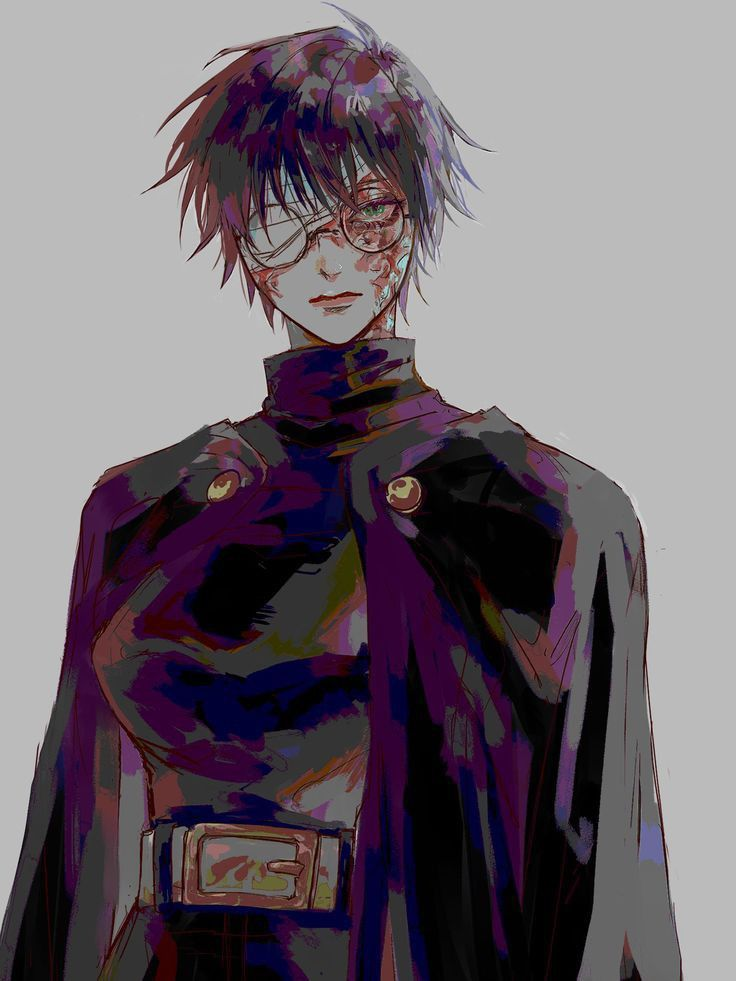

In [ ]:
from PIL import Image

# Gantilah path di bawah ini dengan jalur file yang ada di Google Drive Anda
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/MAKI ZENIN.jpeg'

# Membuka dan menampilkan gambar
img = Image.open(file_path)
img.show() # menampilkan gambar menggunakan image viewer
display(img) # metode alternatif menampilkan gambar dalam cell Colab


In [ ]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[21699, 22000, 10344, 9940, 9167, 6554, 5350, 5180, 4072, 3418, 3122, 2706, 2403, 1987, 1787, 1628, 1540, 1437, 1639, 1501, 1326, 1385, 1226, 1177, 1172, 1104, 1057, 1039, 1021, 1025, 1057, 1094, 1127, 1179, 1232, 1266, 1308, 1481, 1447, 1707, 1684, 1963, 2083, 2237, 2530, 2959, 3540, 4214, 5507, 7576, 12593, 20093, 14003, 10216, 7911, 6881, 5770, 4892, 4217, 3441, 2788, 2401, 2138, 1987, 1731, 1637, 1445, 1364, 1312, 1341, 1129, 1100, 1003, 917, 874, 877, 903, 923, 950, 901, 898, 882, 930, 966, 932, 960, 1020, 997, 1088, 1037, 1168, 1304, 1402, 1429, 1580, 1737, 1905, 2122, 2579, 3086, 3572, 4870, 14084, 8399, 6869, 4752, 3726, 3073, 2348, 2124, 1754, 1500, 1304, 1147, 1041, 935, 799, 696, 573, 562, 496, 495, 438, 388, 423, 379, 355, 377, 341, 326, 311, 354, 311, 347, 323, 357, 362, 360, 341, 349, 407, 373, 371, 416, 410, 443, 477, 557, 539, 712, 856, 688, 1309, 2580, 1018, 756, 736, 684, 534, 525, 490, 420, 403, 333, 321, 305, 289, 274, 229, 233, 214, 179, 186, 219, 215, 217, 185

* r, g, b = img.split(): Memisahkan gambar berwarna menjadi tiga R=Red,G=Green, B=Blue.

* print(len(r.histogram())): Menampilkan jumlah elemen dalam histogram merah. Jumlahnya 256, karena setiap nilai dari 0 hingga 255 dihitung.

* print(r.histogram()): merupakan nilai panjang distribusi intensitas warna merah. Ini menunjukkan jumlah piksel yang memiliki intensitas tertentu di channel merah dan beraneka ragam. Outputnya berupa daftar 256 elemen dari 0-255. sebagai contoh diatas saat di cetak kolom 0 = 21699 yang berarti 21699 piksel pada intensitas 0 warna merah dan seterusnya.

**TUGAS PRAKTIKUM (Wisconsin Breast Cancer)**
#Deskripsi Tugas
Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B).

Tugas Anda adalah:

1. Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.

2. Lakukan proses encoding pada kolom "diagnosis".

3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.

4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [ ]:
# TUGAS 1
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Path lengkap ke file di Google Drive
file_path = '/content/drive/My Drive/Semester 5/Machine Learning/wbc.csv'

# Membaca file CSV
df = pd.read_csv(file_path)
unsed = ['id', 'Unnamed: 32']
df.drop(columns=unsed, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# TUGAS 2

# Membuat Variabel LabelEncoder
le = LabelEncoder()

# Encoding pada kolom diagnosis
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Mencetak khusus kolom diagnosis
print(df['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64


In [ ]:
# TUGAS 3

# Memisahkan kolom numerik saja
numeric = df.select_dtypes(include=['float64', 'int64']).columns

# Membuat Variabel StandardScaler
scaler = StandardScaler()

# Proses standarisasi pada kolom numerik dengan metode fit dan transform
df[numeric] = scaler.fit_transform(df[numeric])

# Mencetak hasilnya
print(df.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0   1.297676     1.097064     -2.073335        1.269934   0.984375   
1   1.297676     1.829821     -0.353632        1.685955   1.908708   
2   1.297676     1.579888      0.456187        1.566503   1.558884   
3   1.297676    -0.768909      0.253732       -0.592687  -0.764464   
4   1.297676     1.750297     -1.151816        1.776573   1.826229   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         1.568466          3.283515        2.652874             2.532475   
1        -0.826962         -0.487072       -0.023846             0.548144   
2         0.942210          1.052926        1.363478             2.037231   
3         3.283553          3.402909        1.915897             1.451707   
4         0.280372          0.539340        1.371011             1.428493   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0       2.217515  ...      1.886690      -1.3

In [ ]:
# TUGAS 4

# Stratified split pertama untuk data latih dan data unsee
df_train, df_unsee = train_test_split(df, test_size=0.2, random_state=0, stratify=df['diagnosis'])

# Stratified split kedua untuk data validasi dan data uji
df_val, df_test = train_test_split(df_unsee, test_size=0.5, random_state=0, stratify=df_unsee['diagnosis'])

print(f'Jumlah label data asli:\n{df["diagnosis"].value_counts()}')
print(f'Jumlah label data train:\n{df_train["diagnosis"].value_counts()}')
print(f'Jumlah label data val:\n{df_val["diagnosis"].value_counts()}')
print(f'Jumlah label data test:\n{df_test["diagnosis"].value_counts()}')


Jumlah label data asli:
diagnosis
-0.770609    357
 1.297676    212
Name: count, dtype: int64
Jumlah label data train:
diagnosis
-0.770609    285
 1.297676    170
Name: count, dtype: int64
Jumlah label data val:
diagnosis
-0.770609    36
 1.297676    21
Name: count, dtype: int64
Jumlah label data test:
diagnosis
-0.770609    36
 1.297676    21
Name: count, dtype: int64
